In [1]:
import anesthetic as ns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
chains = ns.read_chains("../fusions_samples/diffusion")
new_columns = {str(i): i for i in range(5)}
chains = chains.rename(columns=new_columns)
# un = un.rename(columns=new_columns)

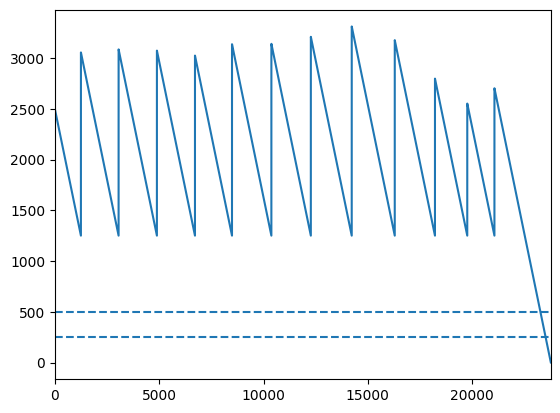

In [35]:
chains.nlive.plot()
plt.xlim(0,len(chains))
plt.hlines(250,0,len(chains),linestyles='dashed')
plt.hlines(500,0,len(chains),linestyles='dashed')

/Users/yallup/projects/fusions/env/lib/python3.11/site-packages/numpy/lib/index_tricks.py:186: RuntimeWarning: invalid value encountered in multiply
  nn[k] = (nn[k]*step+start)
/Users/yallup/projects/fusions/env/lib/python3.11/site-packages/numpy/lib/index_tricks.py:186: RuntimeWarning: invalid value encountered in add
  nn[k] = (nn[k]*step+start)
/Users/yallup/projects/fusions/env/lib/python3.11/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


RuntimeError: Error in qhull Delaunay triangulation calculation: input inconsistency (exitcode=1); use python verbose option (-v) to see original qhull error.

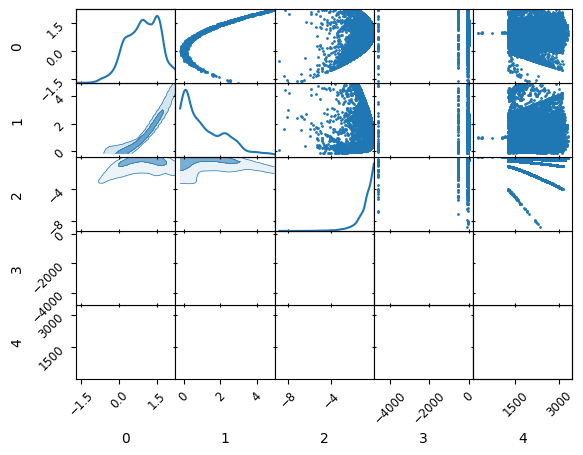

In [36]:
a=ns.MCMCSamples(chains.set_beta((1.0)).compress().to_numpy()[...,:5]).plot_2d()
# pc.plot_2d(a)

,0,1
0,DiagonalAx...,OffDiagona...
1,OffDiagona...,DiagonalAx...


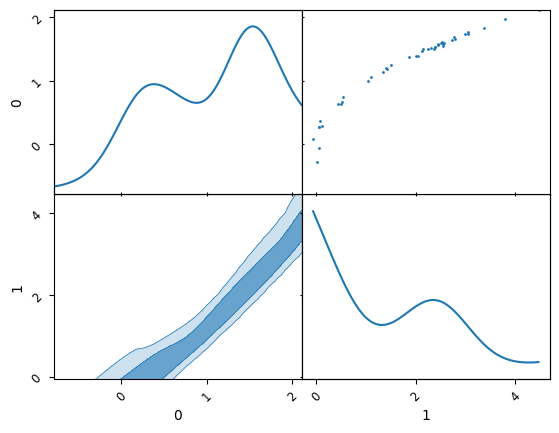

In [38]:
chains.compress(ncompress="equal")
ns.MCMCSamples(chains.sample(100)).plot_2d(np.arange(2))

In [39]:
import pickle
import numpy as np
from anesthetic import MCMCSamples
trace = pickle.load(open("trace.pkl", "rb"))
# pc = ns.read_chains("../chains/test")

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


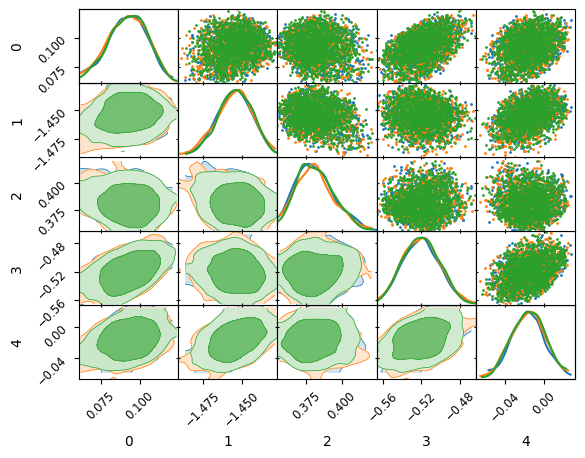

In [7]:

i=list(trace.live.keys())[-1]
diff = np.asarray(trace.diff[i])
live = np.asarray([xi.x for xi in trace.live[i]])
points = np.asarray([xi.x for xi in trace.accepted_live[i]])
prior = np.asarray(trace.prior[i].squeeze())
a = MCMCSamples(diff).plot_2d()
# a=MCMCSamples(prior).plot_2d()
a=MCMCSamples(live).plot_2d(a)
MCMCSamples(points).plot_2d(a)
# pc.plot_2d(a)
# len(diff), len(live), len(points)

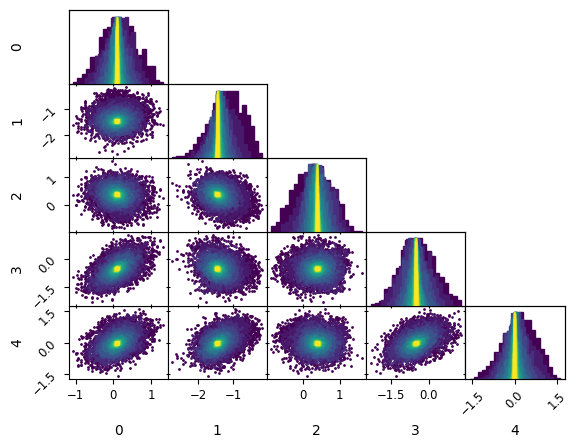

In [8]:
# prior = model.prior.rvs(1000)
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(0, 1, len(trace.live.keys()))]
f,a = ns.make_2d_axes(np.arange(5),upper=False)
# a = MCMCSamples(prior).plot_2d(kinds ={"lower":"kde_2d","diagonal":"hist_1d"},c = colors[0])
for i in trace.live.keys():
    points = np.asarray([xi.x for xi in trace.accepted_live[i]])
    MCMCSamples(points).plot_2d(a,kinds = {"lower":"scatter_2d","diagonal":"hist_1d"},c= colors[i],ec = colors[i])


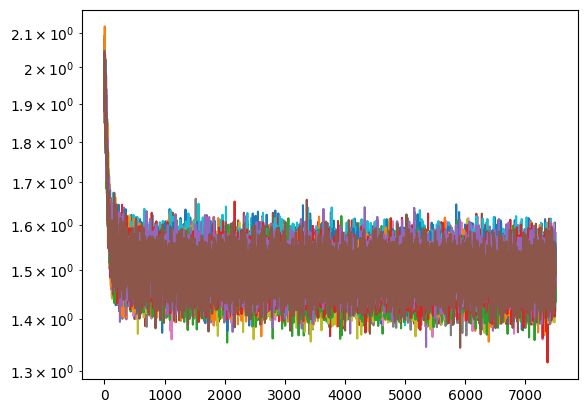

In [9]:
import matplotlib.pyplot as plt
for k in trace.losses.keys():
    plt.yscale("log")
    plt.plot(trace.losses[k])

In [10]:
live_x = np.asarray([y.x for y in trace.live[trace.iteration[-2]]])
active_x = np.asarray([y.x for y in trace.accepted_live[trace.iteration[-2]]])
# diff_x = np.asarray([y.x for y in trace.diff[trace.iteration[-3]]])

In [11]:
trace.diff

{0: array([[ 0.12875623, -2.322297  ,  0.46974882,  0.54436994, -0.08798997],
        [-0.08101328, -1.9826486 , -0.02946372, -0.72423875, -1.0475804 ],
        [ 0.22869532, -0.4632597 , -0.07139507, -0.7842607 , -0.28580886],
        ...,
        [ 0.3666252 , -0.9282159 , -0.40575588, -0.29213625,  0.5953117 ],
        [-0.22604598, -0.60921603, -0.34744138, -0.85140985,  0.5671899 ],
        [ 0.27477282, -1.48206   , -0.43526554, -1.2727387 , -0.7335612 ]],
       dtype=float32),
 1: array([[ 0.32512313, -1.0007067 ,  1.1115788 , -0.2667555 ,  0.4381582 ],
        [ 0.53062075, -0.697646  ,  0.57054687, -0.50783503,  0.5762782 ],
        [ 0.477176  , -0.8519405 ,  0.27631372, -0.04570508,  0.21772972],
        ...,
        [-0.21549945, -0.8553504 ,  0.47735545, -1.5259287 ,  0.11501707],
        [-0.12798688, -1.5744874 ,  0.03657311, -0.06855696, -0.4065569 ],
        [ 0.51462305, -1.4058661 ,  0.559783  , -0.3803956 , -0.28665432]],
       dtype=float32),
 2: array([[-0.29018

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


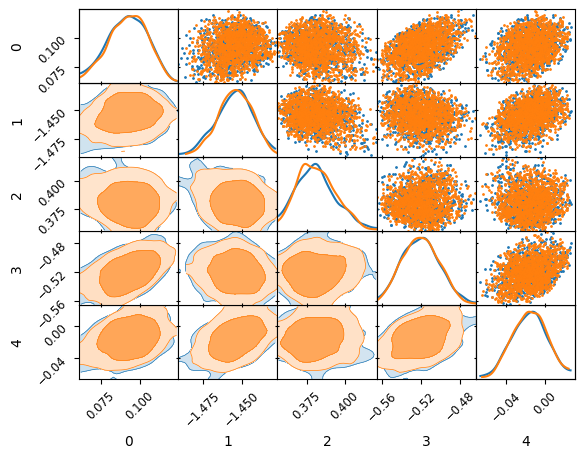

In [12]:
a=MCMCSamples(live_x).plot_2d()
MCMCSamples(active_x).plot_2d(a)

In [13]:
from fusions.cfm import CFM
from fusions.utils import unit_hyperball

In [14]:
diff = CFM(n=5,latent=unit_hyperball(5))
diff.train(live_x,n_epochs=5000,noise = 1e-5)
x = diff.rvs(500)


100%|██████████| 5000/5000 [00:11<00:00, 450.49it/s, loss=0.022667294]


,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


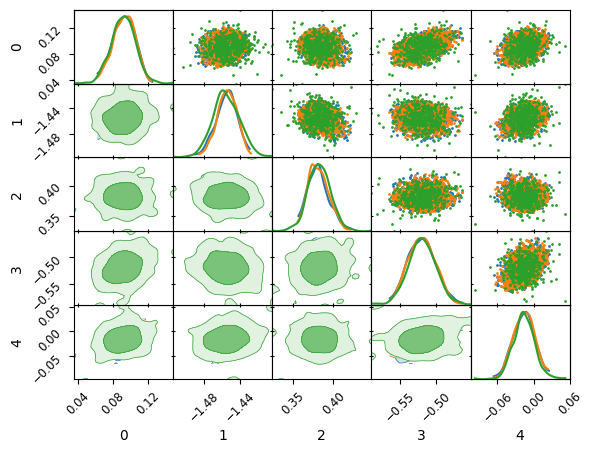

In [15]:
a=MCMCSamples(live_x).plot_2d()
MCMCSamples(active_x).plot_2d(a)
MCMCSamples(x).plot_2d(a)

In [16]:
chains.logX()
from scipy.special import logsumexp
logsumexp((chains.logdX(),chains.logL)) 

19.48816623402871

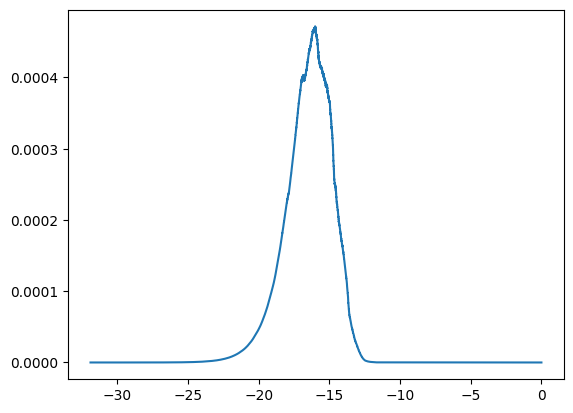

In [17]:
plt.plot(chains.logX(),np.exp(chains.logL + chains.logX()))


<Axes: >

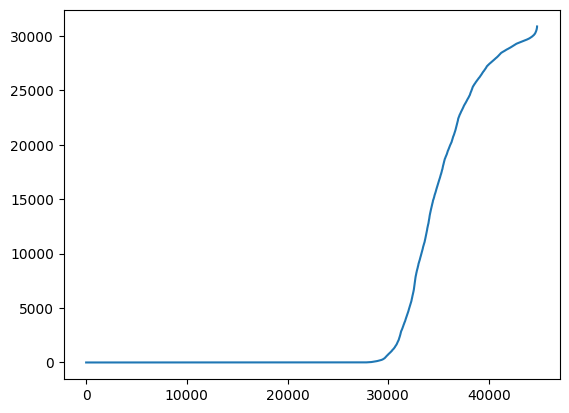

In [18]:
np.exp(chains.logL).plot()
# plt.yscale("log")


In [19]:
import numpy as np 
import anesthetic as ns
from lsbi.model import MixtureModel
dims = 5
data_dims = dims
# v hard
np.random.seed(123456)
# np.random.seed(1)

mixtures = 5
A = np.random.rand(mixtures, data_dims, dims)
# A /= np.linalg.norm(A, axis=2)[:, :, None] 
# A *=.008
TargetModel = MixtureModel(
    # M=np.stack([np.eye(dims), -np.eye(dims)]),
    M=A,
    mu=np.zeros(dims),
    Sigma=np.eye(dims),
    m=np.zeros(data_dims),
    C=np.ones(data_dims) * .1**2,
)
data = TargetModel.evidence().rvs()
logz = TargetModel.evidence().logpdf(data)

In [20]:
A[0]

array([[0.12696983, 0.96671784, 0.26047601, 0.89723652, 0.37674972],
       [0.33622174, 0.45137647, 0.84025508, 0.12310214, 0.5430262 ],
       [0.37301223, 0.44799682, 0.12944068, 0.85987871, 0.82038836],
       [0.35205354, 0.2288873 , 0.77678375, 0.59478359, 0.13755356],
       [0.85289978, 0.23550748, 0.14622723, 0.58986877, 0.57401177]])

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


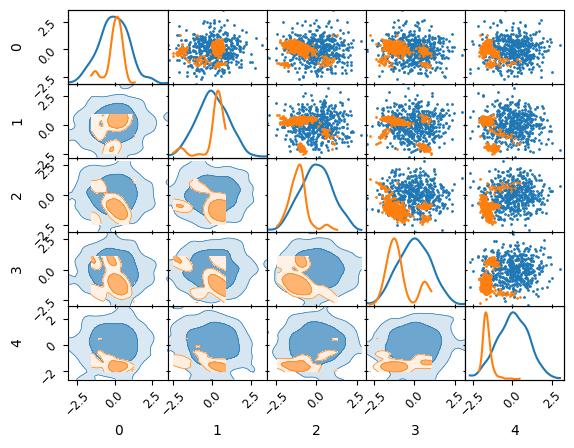

In [21]:
a = ns.MCMCSamples(TargetModel.prior().rvs(500)).plot_2d()
ns.MCMCSamples(TargetModel.posterior(data).rvs(500)).plot_2d(a)